In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("ggplot")

In [28]:
DATA_PATH = '../data/'
matchings = pd.read_csv(DATA_PATH + 'final_matchings.csv')

In [29]:
matchings.head()

,Client_id,Hash,Prob_cond_client,Prob_cond_hash
0,22,555179529769684,1.0000,1.000000
1,157640,392346305629129,0.8125,0.722222
2,417994,295184210409095,1.0000,0.342857
3,486068,555123579189935,1.0000,0.666667
4,178822,471566460460121,1.0000,1.000000


In [30]:
def CountUniques(df):
    n_unique = {}
    pct_unique = {}
    rows = len(df)
    for i in range(df.shape[1]):
        col = df.columns[i]
        n_unique[col] = df[col].nunique()
        pct_unique[col] = n_unique[col] / rows
    f = pd.DataFrame([n_unique, pct_unique], index = ['n_unique','pct_unique']).transpose()
    f['n_unique'] = f['n_unique'].astype(int)
    return f

In [31]:
CountUniques(matchings)

,n_unique,pct_unique
Client_id,12011,1.000000
Hash,12011,1.000000
Prob_cond_client,50,0.004163
Prob_cond_hash,169,0.014070


In [32]:
matchings

,Client_id,Hash,Prob_cond_client,Prob_cond_hash
0,22,555179529769684,1.000000,1.000000
1,157640,392346305629129,0.812500,0.722222
2,417994,295184210409095,1.000000,0.342857
3,486068,555123579189935,1.000000,0.666667
4,178822,471566460460121,1.000000,1.000000
...,...,...,...,...
12006,733210,511015395185094,0.166667,1.000000
12007,650238,282444792929272,0.166667,0.500000
12008,686726,316669456819125,0.200000,1.000000
12009,68465,440700464797077,0.142857,1.000000


In [33]:
x = matchings['Prob_cond_client']
y = matchings['Prob_cond_hash']

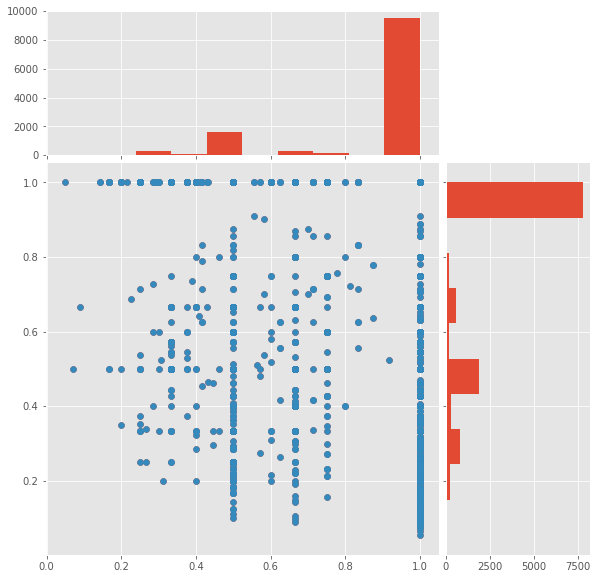

In [34]:
fig, axScatter = plt.subplots(figsize=(20, 10))

# the scatter plot:
axScatter.scatter(x, y)
axScatter.set_aspect(1.)
axScatter.scatter(x, y)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 2, pad=0.1, sharey=axScatter)

# make some labels invisible
axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(0, xymax, binwidth)
axHistx.hist(x, bins=10)
axHisty.hist(y, bins=10, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.



plt.show()

In [35]:
# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth


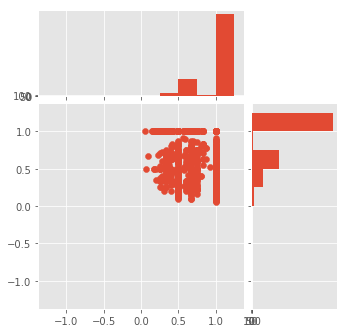

In [36]:

fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
axScatter.scatter(x, y)
axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

axHistx.set_yticks([0, 50, 100])

axHisty.set_xticks([0, 50, 100])

plt.show()